#### These examples come from Guilherme Samora’s excellent [Panda Exercises](https://github.com/guipsamora/pandas_exercises)

In [95]:
import pandas as pd
import datetime

### We're going to import a publicly available wind dataset. The dataset contains daily average wind speeds for 1961-1978 from 12 meteorological stations in the Republic of Ireland (Haslett and Raftery 1989).

### Each line corresponds to one day of data in the following format: year, month, day, average wind speed at each of the stations. Station names are abbreviated as RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, and MAL

### The data are in knots, not in m/s.

### The original data file has three columns Year, Month, Day for time. We're going to use the parse_dates feature in read_table() to say that these columns (column numbers 0, 1, and 2 can be combined to create a date in the format YYYY-MM-DD

In [96]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_table(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Year 2061?? That's a problem! The year is given by two digits in the data file. For example, 61 for 1961. The parse_dates routine is having trouble with this and incorrectly assigning it to the wrong century! 

### First rule of scientific computing - explore your data! Look at minimums, maximums, and potential outliers

### Let's create a function that will fix this!

In [97]:
# function that uses datetime
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# data.info()
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### The next thing we need to note is the 'NaN' values. NaN stands for 'Not A Number' and it's a common way for a data producer to note missing values. In fact, many of the scientific computing libraries are set up to recognize and ignore NaN.

### 'Null' is term from the database community, which means a value doesn't exist. A function designed to find 'null' values will look for all occurances of NaN. For instance, the Pandas library has an isnull() function that, when combined with the sum() function, can add up all the missing values. Here's how many values are missing from each station.

In [98]:
data.isnull().sum()

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

### Second rule of scientific computing - real-world data is messy and incomplete!

#### Let's do some statistics with the data we do have. What is the average wind speed at each location?

In [99]:
data.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

#### If we call the mean function twice then we get the mean of the means. In other words, the average across all stations

In [100]:
data.mean().mean()

10.227982360836924

#### The Pandas library can also compute some basic statistics for each station. Here's how

In [101]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


#### Pandas has some handy functions for working with dates. Our column Yr_Mo_Dy is a date. However, before we apply Pandas functions we must explictly tell it that Yr_Mo_Dy is a date and set it as an index

In [102]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')

#### Now that Pandas knows Yr_Mo_Dy is a date, we can ask it to aggregate (average) our data over different time intervals. Pandas understands the following time intervals

#### A = annually
#### M = monthly
#### W = weekly

In [103]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [104]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
1961-06,9.904138,8.520333,8.867000,6.083000,10.824000,6.707333,9.095667,8.849333,9.086667,9.940333,13.995000,14.553793
1961-07,10.614194,8.221613,9.110323,6.340968,10.532581,6.198387,8.353333,8.284194,8.077097,8.891613,11.092581,12.312903
1961-08,12.035000,10.133871,10.335806,6.845806,12.715161,8.441935,10.093871,10.460968,9.111613,10.544667,14.410000,14.345333
1961-09,12.531000,9.656897,10.776897,7.155517,11.003333,7.234000,8.206000,8.936552,7.728333,9.931333,13.718333,12.921667


In [105]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
1961-02-06/1961-02-12,19.684286,16.417143,17.304286,10.774286,14.718571,12.522857,14.934286,14.850000,14.064286,14.440000,21.832857,19.155714
1961-02-13/1961-02-19,15.130000,15.091429,13.797143,10.083333,13.410000,11.868571,9.542857,12.128571,12.375714,13.542857,21.167143,16.584286
1961-02-20/1961-02-26,15.221429,13.625714,14.334286,8.524286,13.655714,10.114286,11.150000,10.875714,10.392857,12.730000,16.304286,14.322857


#### Let's try plotting our data

#### Important Note. Matplotlib will try to open a new window on the computer it's running on. In a cloud-based environment like this, that's not what we want. We want the plotting to be done locally (on the computer we're using to log into Jupyter Hub). We need to issue a special command to do that

In [106]:
import matplotlib.pyplot as plt # import matplotlib with shorter name
# tell Python to do the plotting here, not on the server
%matplotlib inline 

#### First, let's try looking at all the Dublin data

Text(0.5,1,'Dublin Wind Speed 1961-1978')

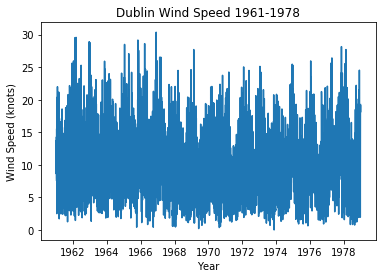

In [128]:
plt.plot(data['DUB'])
plt.ylabel('Wind Speed (knots)')
plt.xlabel('Year')
plt.title('Dublin Wind Speed 1961-1978')

#### That's a lot of data! We can see some general trends, but it's difficult to make see everything that's going on given how many data points are being displayed

#### Let's try resampling the data and looking at monthly averages

#### The groupby function we looked at earlier did this for us. However, groupby is a one-time summary and not something we can use in plotting. We need to actually create a new dataset that is the monthly averages. Fortanately, Pandas can do this for us rather easily

#### Pandas refers to a table of data as a 'DataFrame'. We'll start by creating a new DataFrame called 'monthly'. From there, we just need to tell Python what to include in the new table. Here, we're including just three columns - the Dublin monthly averages, the Killarney monthly averages, and the dates. The 'resample' function will compute the averages for us. We just need to tell it what to compute over and the rate. Here, we use 'M' to indicate monthly. The date column is brought over automatically because Pandas knows we can't do much without it.

In [118]:
monthly = pd.DataFrame()
monthly['DUB'] = data['DUB'].resample('M').mean()
monthly['KIL'] = data['KIL'].resample('M').mean()

#### Let's try plotting the monthly Dublin wind speed

Text(0.5,1,'Dublin Monthly Wind Speed 1961-1978')

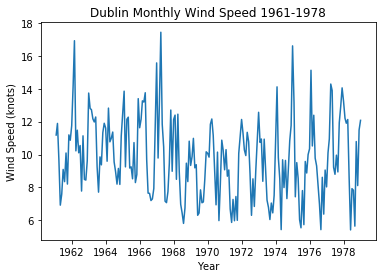

In [129]:
plt.plot(monthly['DUB'])
plt.ylabel('Wind Speed (knots)')
plt.xlabel('Year')
plt.title('Dublin Monthly Wind Speed 1961-1978')

#### Hmm... Looks like there's a trend there. Looks like, for any given year, the wind speed is highest in winter and decreases during the summer. Let's look at this further by picking out a few years to test our theory

#### Pandas has a 'truncate' function that let's us subset the data by time range

In [127]:
year1 = monthly.truncate(before='1962-01-01', after='1962-12-31')
year2 = monthly.truncate(before='1974-01-01', after='1974-12-31')

#### Let's look at Dublin for each of these years

Text(0.5,1,'Dublin Monthly Wind Speed 1962')

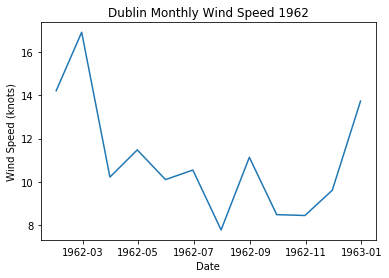

In [133]:
plt.plot(year1['DUB'])
plt.ylabel('Wind Speed (knots)')
plt.xlabel('Date')
plt.title('Dublin Monthly Wind Speed 1962')

Text(0.5,1,'Dublin Monthly Wind Speed 1974')

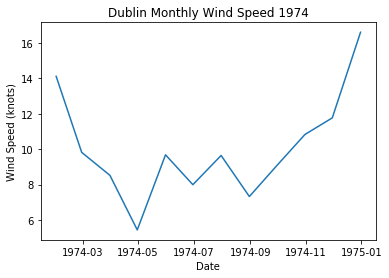

In [134]:
plt.plot(year2['DUB'])
plt.ylabel('Wind Speed (knots)')
plt.xlabel('Date')
plt.title('Dublin Monthly Wind Speed 1974')

#### What about Dublin and Killarney? How do they compare? If we call the plot function twice, we can look at them together in the same visualization

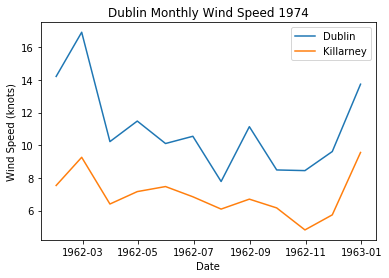

In [139]:
plt.plot(year1['DUB'])
plt.plot(year1['KIL'])
plt.ylabel('Wind Speed (knots)')
plt.xlabel('Date')
plt.title('Dublin Monthly Wind Speed 1974')
# note that this needs to be in 
# the same order as we called plot
plt.legend(['Dublin','Killarney'])

#### Can we visualize our data any other way? Let's try a histogram. Ask Matplotlib to group our windspeeds by number of occurances

Text(0.5,1,'Dublin Monthly Wind Speed')

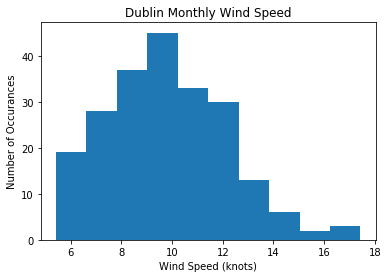

In [144]:
plt.hist(monthly['DUB'])
plt.ylabel('Number of Occurances')
plt.xlabel('Wind Speed (knots)')
plt.title('Dublin Monthly Wind Speed')

Text(0.5,1,'Killarney Monthly Wind Speed')

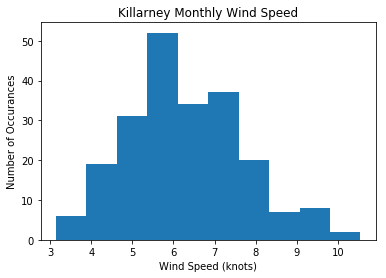

In [145]:
plt.hist(monthly['KIL'])
plt.ylabel('Number of Occurances')
plt.xlabel('Wind Speed (knots)')
plt.title('Killarney Monthly Wind Speed')